In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [5]:
class fftsig:

    def __init__(self):
        self.f = np.array
        self.FT = np.array
        self.amp = np.array
        self.phase = np.array    

In [6]:
def myfft(t, s1):
    
    nt = np.size(t) # number of time samples
    #dt = t.head[2] - t.head[1] # time step between 2nd and 3rd time
    
    mysig = fftsig() # Setting a varible to the fftsig() class
    
    s1f = np.fft.fftshift(np.fft.fft(s1)) # Takes the fast FT of the inputted signal and
                                          # shifts it such that the zero frequency component
                                          # is centered
            
    mysig.FT = s1f # Initilizing the FT class varible
    
    
    s1f_amp = np.abs(s1f) # Calculating the amplitude spectrum
    mysig.amp = s1f_amp # Initilizing the amp class varible
    
    
    s1f_phase = np.arctan2(np.imag(s1f),np.real(s1f)) # Calculating the phase spectrum
    mysig.phase = s1f_phase # Initilizing the phase class varible
    
    #f = np.fft.fftshift(np.fft.fftfreq(nt,dt))
    #mysig.f = f
    
    
    return mysig

In [7]:
dfs=[]
names = ['0_0', '0_5', '1_0', '1_5', '2_0', '2_5', '3_0', '3_5', '4_0', '4_5', '5_0', '5_5', '6_0', '6_5', '7_0',
        '7_5', '8_0', '8_5', '9_0', '9_5', '10_0', '10_5', '11_0', '11_5', '12_0', '12_5', '13_0', '13_5', '14_0', 
         '14_5', '15_0']

for n in names:
    #df = pd.read_csv('D:/Documents/MSc/DATA/Particle_velocity_measurements/2020-09-21/'+ n +'.csv', header = [0,1])
    df = pd.read_csv('D:/Documents/MSc/DATA/Particle_velocity_measurements/2020-09-24/'+ n +'a.csv', header = [0,1])
    #df = np.loadtxt('D:/Documents/MSc/DATA/Particle_velocity_measurements/2020-09-21/'+ n +'.csv', delimiter=",", skiprows=2)
    dfs.append(df)

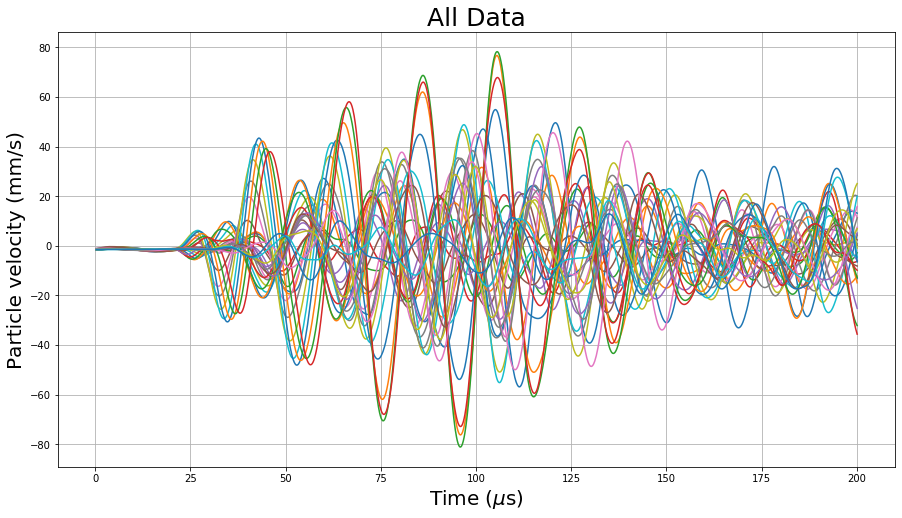

In [8]:
plt.figure(figsize=(15,8))
[plt.plot(dfs[i]['x-axis']*1e6, dfs[i]['2']*5) for i in range(0, len(dfs), 1)]
plt.xlabel('Time ($\mu$s)', fontsize=20)
plt.ylabel('Particle velocity (mm/s)', fontsize=20)
plt.title('All Data', fontsize=25)
plt.grid()
plt.show()

In [9]:
h = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2), (4, 0), (4, 1), (4, 2), 
     (5, 0), (5, 1), (5, 2), (6, 0), (6, 1), (6, 2), (7, 0), (7, 1), (7, 2), (8, 0), (8, 1), (8, 2), (9, 0), (9, 1), (9, 2), 
     (10, 1)]
pos = ['0.0 cm', '0.5 cm', '1.0 cm', '1.5 cm', '2.0 cm', '2.5 cm', '3.0 cm','3.5 cm', '4.0 cm', '4.5 cm', '5.0 cm', '5.5 cm', 
       '6.0 cm', '6.5 cm', '7.0 cm', '7.5 cm', '8.0 cm', '8.5 cm', '9.0 cm', '9.5 cm', '10.0 cm', '10.5 cm', '11.0 cm', 
       '11.5 cm', '12.0 cm', '12.5 cm', '13.0 cm', '13.5 cm', '14.0 cm', '14.5 cm', '15.0 cm']

In [10]:
cmap = get_cmap(len(h))

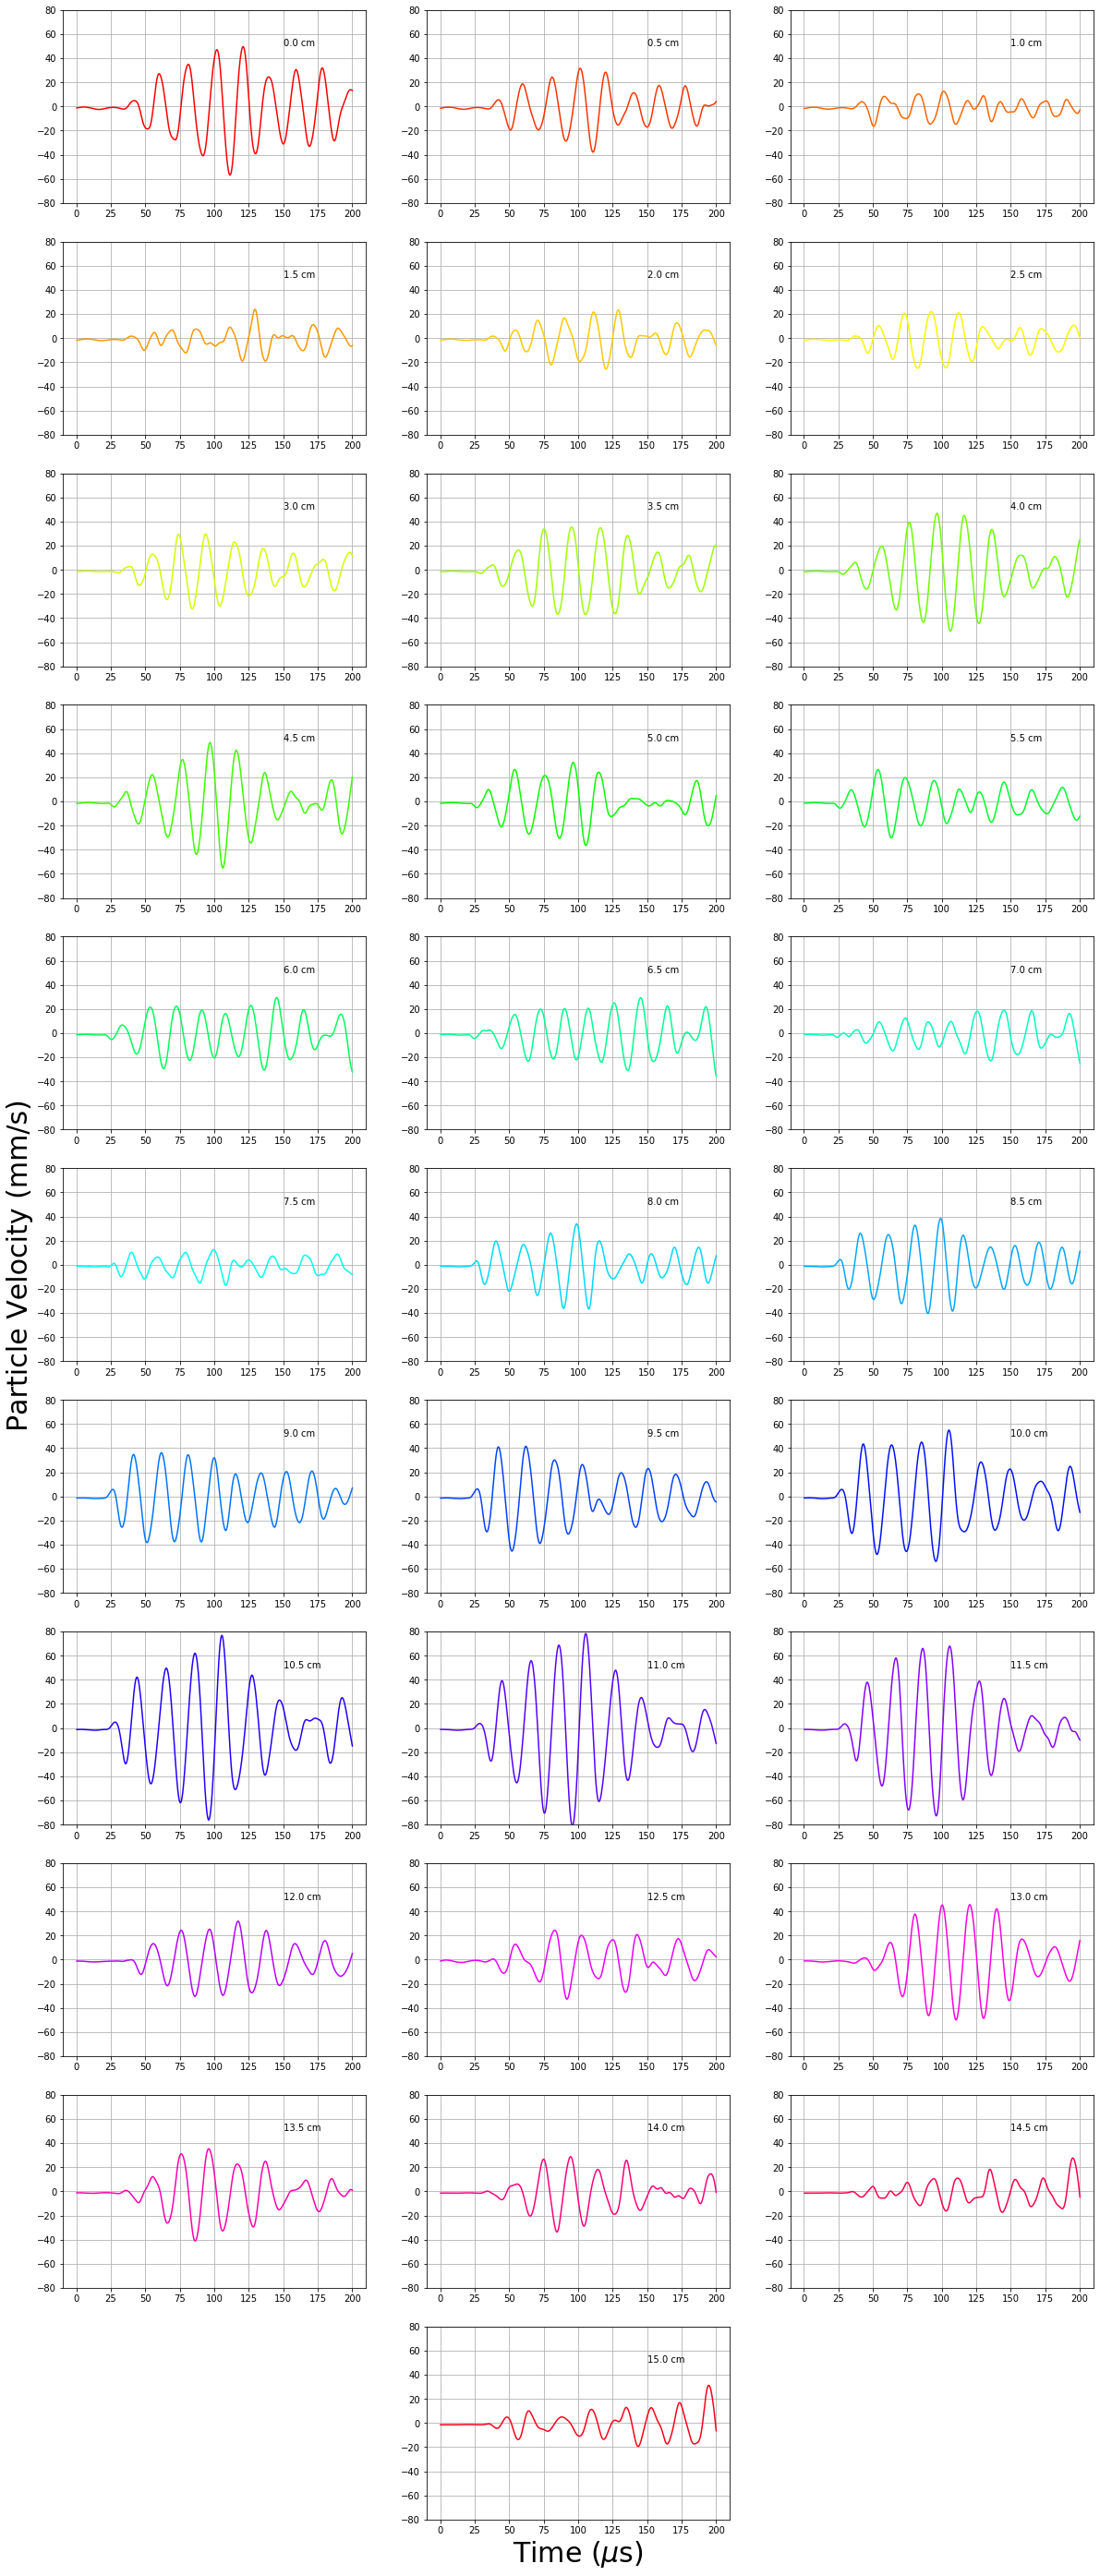

In [11]:
fig, axs = plt.subplots(11, 3, figsize=(20, 50))
[axs[h[p]].plot(dfs[n]['x-axis']*1e6, dfs[n]['2']*5, c=cmap(p)) for p, n in zip(np.arange(0, len(h), 1), 
                                                                                np.arange(0, len(dfs), 1))]
[axs[h[p]].set_ylim(-80.0, 80.0) for p in np.arange(0, len(h), 1)]
[axs[h[p]].grid() for p in np.arange(0, len(h), 1)]
[axs[h[p]].text(150, 50, pos[n]) for p, n in zip(np.arange(0, len(h), 1), np.arange(0, len(pos), 1))]
axs[5, 0].set_ylabel('Particle Velocity (mm/s)', fontsize=30)
axs[10, 1].set_xlabel('Time ($\mu$s)', fontsize=30)
[axs[10, i].axis('off') for i in [0, 2]]
plt.show()

In [12]:
df_maxs=[]
for i in range(0, len(dfs), 1):
    df_max = np.max(dfs[i]['2'])
    df_maxs.append(df_max)

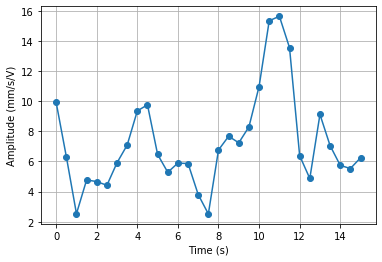

In [13]:
plt.figure()
plt.plot(np.arange(0,15.5,0.5), df_maxs, '-o')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mm/s/V)')
plt.grid()
plt.show()

In [87]:
nt = len(dfs[0]['x-axis'])
print(nt)

2000


In [88]:
print(dfs[0]['x-axis'].head(3).tail(1))
print(dfs[0]['x-axis'].head(2).tail(1))

         second
2  2.000000e-07
         second
1  1.000000e-07


In [89]:
ft_0 =  np.fft.fftshift(np.fft.fft(dfs[0]['2']*5))
f_0 = np.fft.fftshift(np.fft.fftfreq(nt, 1e-6))

In [90]:
fts = []
for i in range(0, len(dfs), 1):
    ft = np.fft.fftshift(np.fft.fft(dfs[i]['2']*5))
    fts.append(ft)

C:\Users\Jacob\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Jacob\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Jacob\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Jacob\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Jacob\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Jacob\anaconda3\

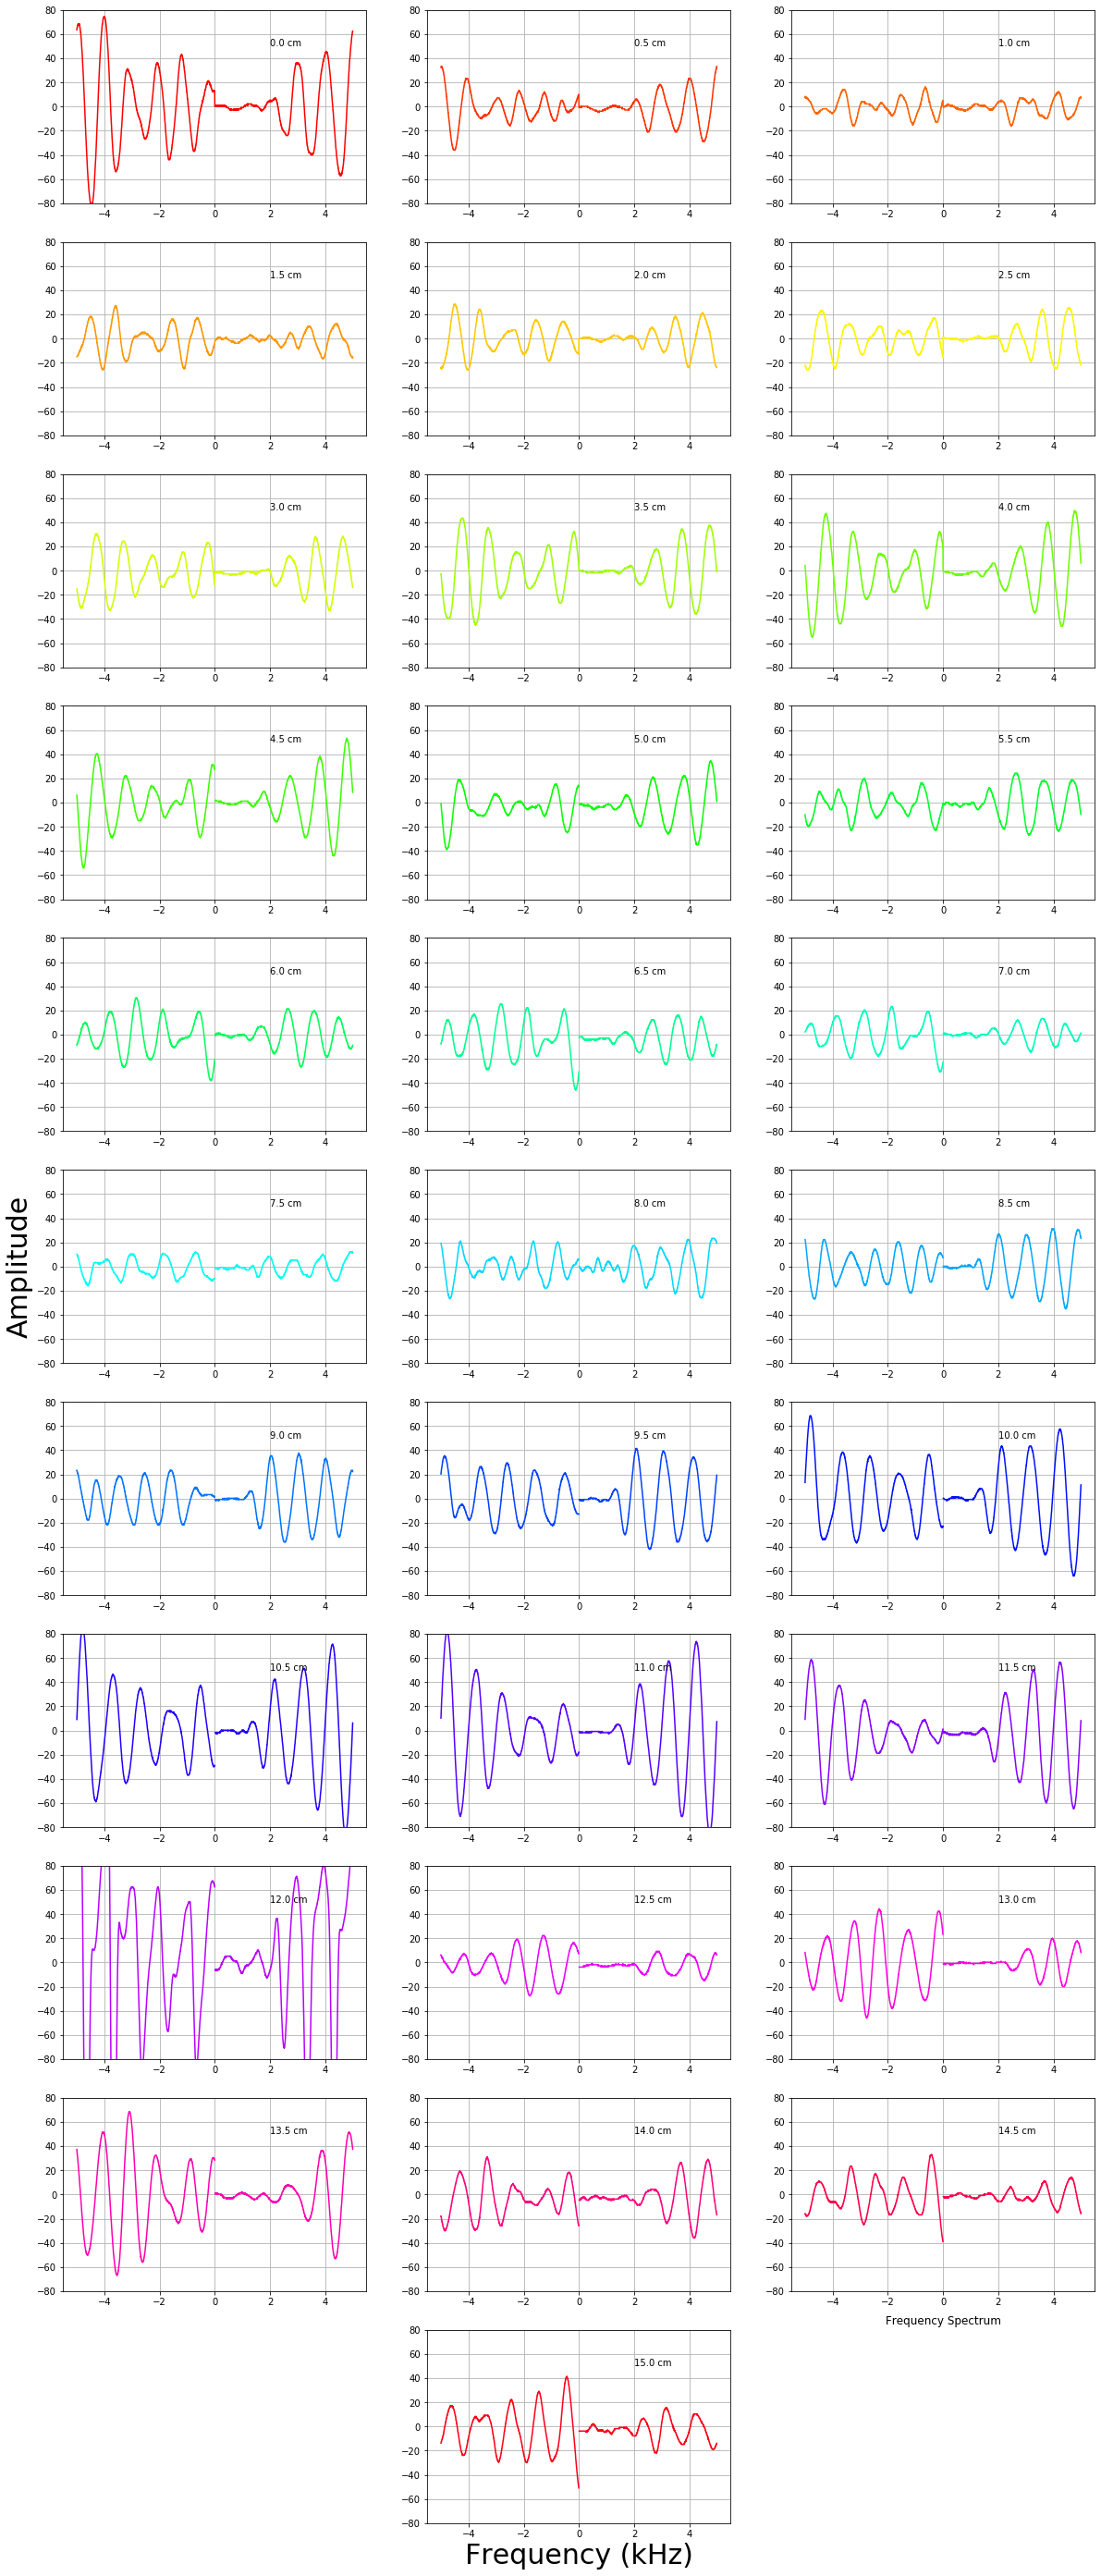

In [100]:
fig, axs = plt.subplots(11, 3, figsize=(20, 50))
[axs[h[p]].plot(f_0/1e5, fts[n], c=cmap(p)) for p, n in zip(np.arange(0, len(h), 1), np.arange(0, len(fts), 1))]
[axs[h[p]].set_ylim(-80.0, 80.0) for p in np.arange(0, len(h), 1)]
[axs[h[p]].grid() for p in np.arange(0, len(h), 1)]
[axs[h[p]].text(2, 50, pos[n]) for p, n in zip(np.arange(0, len(h), 1), np.arange(0, len(pos), 1))]
axs[5, 0].set_ylabel('Amplitude', fontsize=30)
axs[10, 1].set_xlabel('Frequency (kHz)', fontsize=30)
[axs[10, i].axis('off') for i in [0, 2]]
plt.title('Frequency Spectrum')
plt.show()

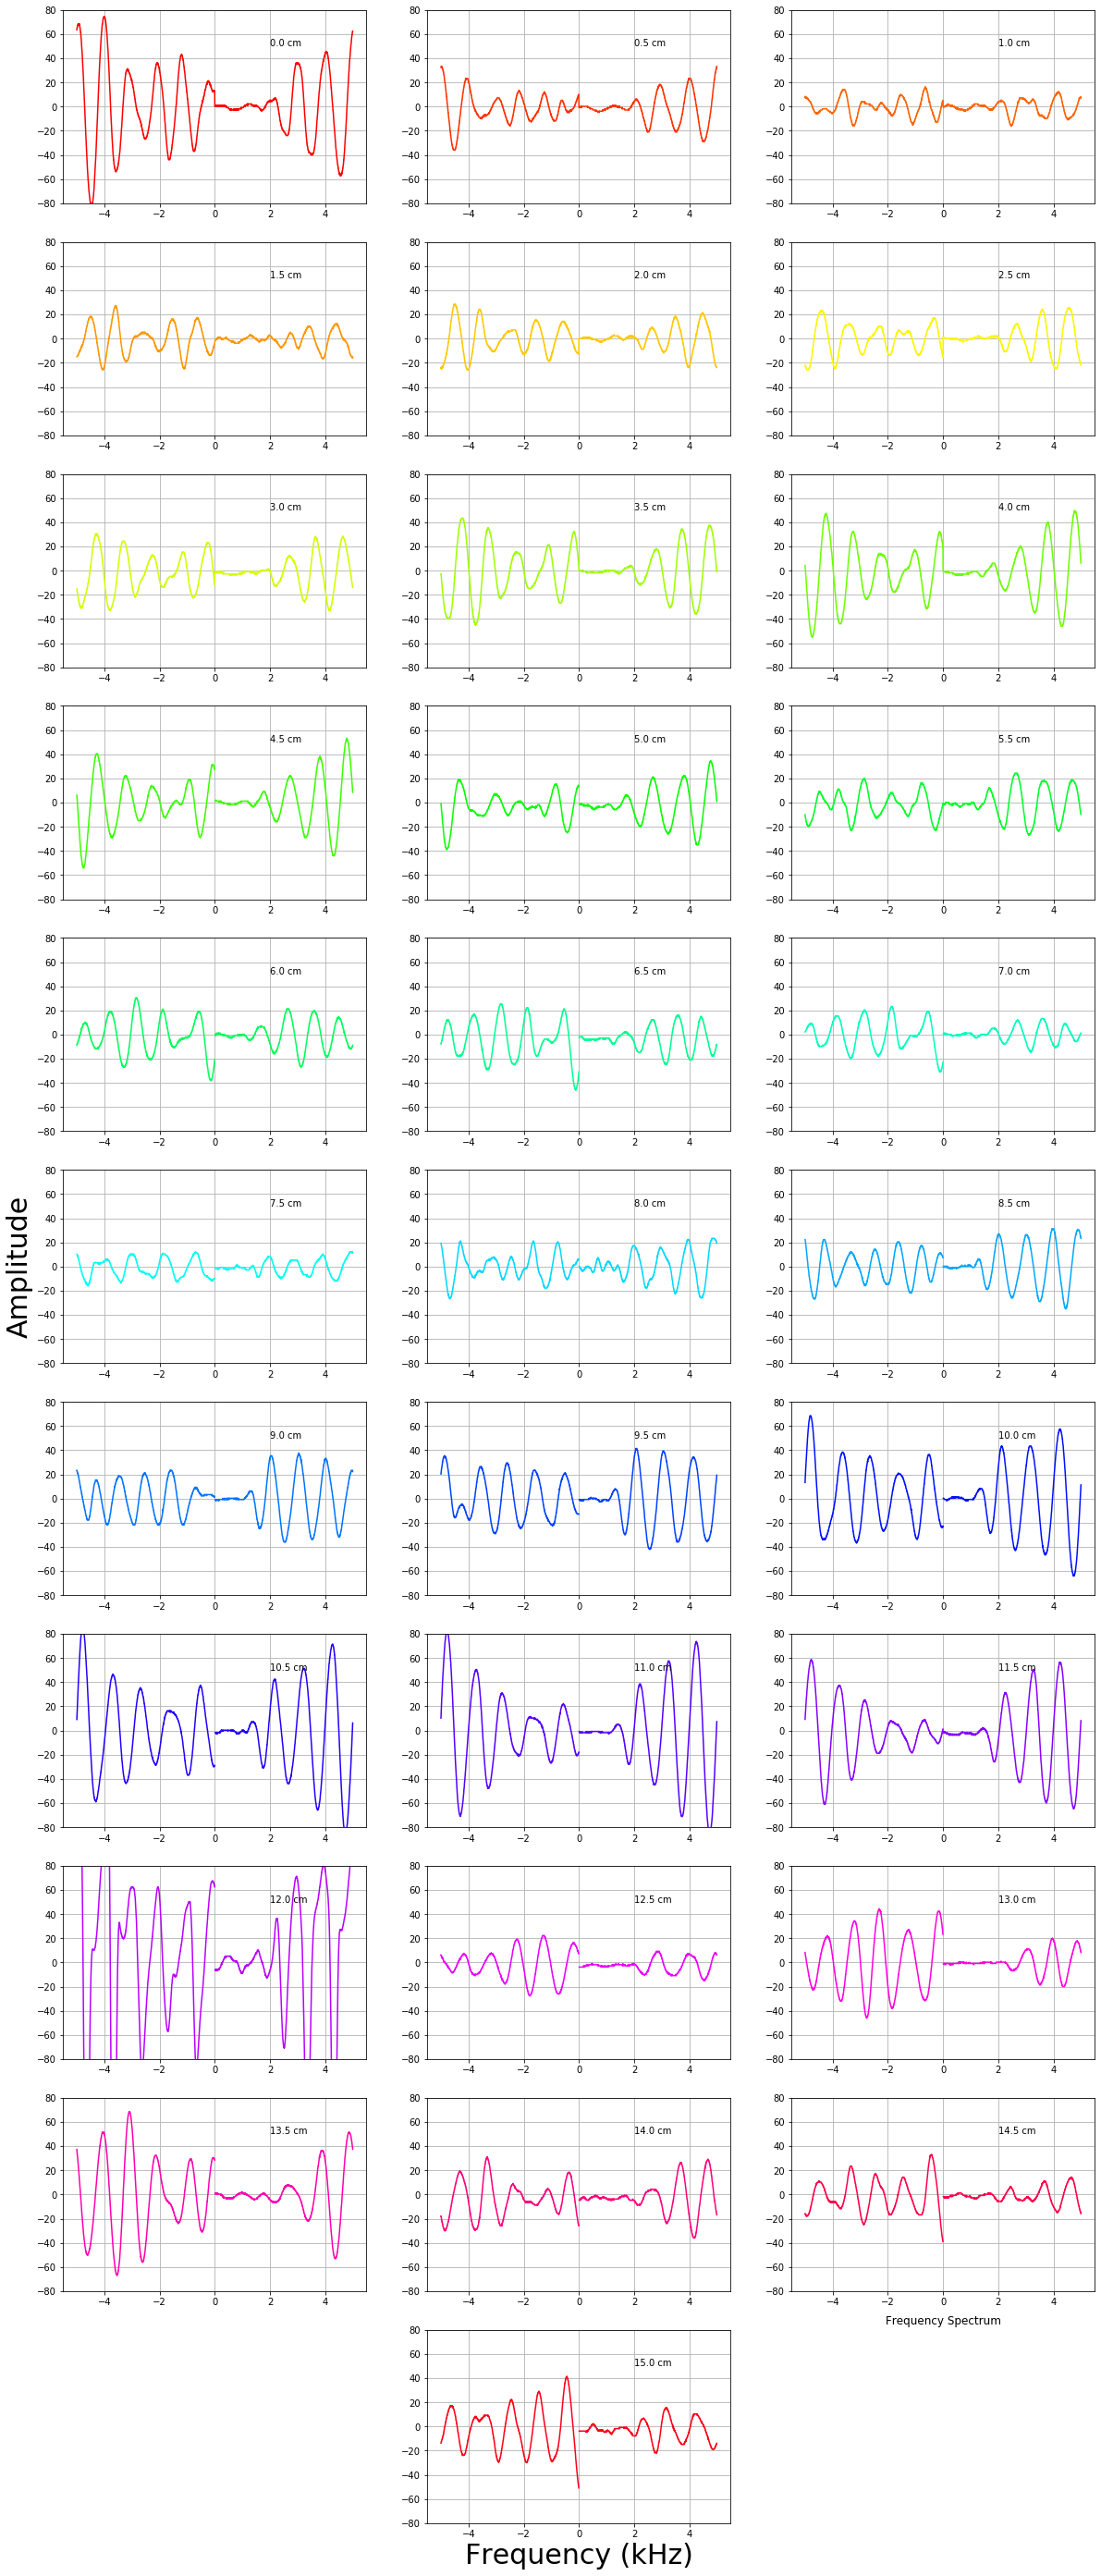

In [101]:
fig, axs = plt.subplots(11, 3, figsize=(20, 50))
[axs[h[p]].plot(f_0/1e5, np.real(fts[n]), c=cmap(p)) for p, n in zip(np.arange(0, len(h), 1), np.arange(0, len(fts), 1))]
[axs[h[p]].set_ylim(-80.0, 80.0) for p in np.arange(0, len(h), 1)]
[axs[h[p]].grid() for p in np.arange(0, len(h), 1)]
[axs[h[p]].text(2, 50, pos[n]) for p, n in zip(np.arange(0, len(h), 1), np.arange(0, len(pos), 1))]
axs[5, 0].set_ylabel('Amplitude', fontsize=30)
axs[10, 1].set_xlabel('Frequency (kHz)', fontsize=30)
[axs[10, i].axis('off') for i in [0, 2]]
plt.title('Frequency Spectrum')
plt.show()